## Import the data.

In [619]:
import pandas as pd

In [620]:
titanic_data = pd.read_csv('train.csv')

In [621]:
#first_class = titanic_data[titanic_data.Pclass == '1'].count()

## What's the sex breakdown of the passengers in each class? (numbers of men, women, and potentially unknown) [mostly done]

In [622]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [623]:
first_class = titanic_data[titanic_data.Pclass == 1].count()

In [624]:
print(first_class)

PassengerId    216
Survived       216
Pclass         216
Name           216
Sex            216
Age            186
SibSp          216
Parch          216
Ticket         216
Fare           216
Cabin          176
Embarked       214
dtype: int64


In [625]:
second_class = titanic_data[titanic_data.Pclass == 2].count()

In [626]:
print(second_class)

PassengerId    184
Survived       184
Pclass         184
Name           184
Sex            184
Age            173
SibSp          184
Parch          184
Ticket         184
Fare           184
Cabin           16
Embarked       184
dtype: int64


In [627]:
third_class = titanic_data[titanic_data.Pclass == 3].count()

In [628]:
print(third_class)

PassengerId    491
Survived       491
Pclass         491
Name           491
Sex            491
Age            355
SibSp          491
Parch          491
Ticket         491
Fare           491
Cabin           12
Embarked       491
dtype: int64


In [629]:
first_class_women = first_class[first_class.Sex == 'female']

In [630]:
print(first_class_women)

216


In [631]:
first_class.Sex

216

In [632]:
first_class_men = pd.crosstab(titanic_data.Pclass, titanic_data.Sex)

In [633]:
print(first_class_men)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


## Did the age distribution differ at all between the passenger classes? Create an illustrative graph.

In [634]:
# We have to compare a categorical variable and a numeric variable. My first thought: create a violin plot.
first_class = titanic_data[titanic_data.Pclass == 1].dropna()
second_class = titanic_data[titanic_data.Pclass == 2].dropna()
third_class = titanic_data[titanic_data.Pclass == 3].dropna()

In [635]:
first_class_age = first_class.Age
second_class_age = second_class.Age
third_class_age = third_class.Age

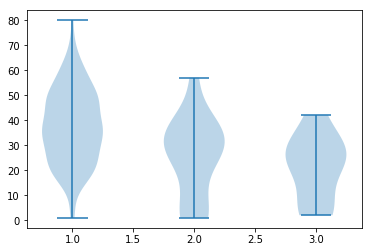

In [636]:
# Note: there was ~5 minutes of finagling with matplotlib here before I got the figure. 
import matplotlib.pyplot as plt
ax = plt.axes()
ax.violinplot(dataset=[first_class_age, second_class_age, third_class_age])
plt.show()

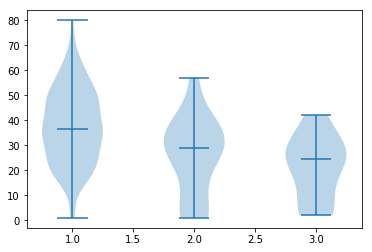

In [637]:
# Updating the figure with tick marks for clarity.
ax = plt.axes()
ax.violinplot(dataset=[first_class_age, second_class_age, third_class_age], showextrema=True, 
              showmedians=True)
plt.show()

## Predictive modeling questions:
### Goal = build a predictive model for survival. (Survival is a 0/1 binary outcome).
#### Create training and test data frames. (If test.csv does not have outcome labels, you can take a subset of train.csv as test data).

In [638]:
# First I find out whether the test data have outcome labels.
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [639]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [640]:
# Looks like there are no survival labels. So we create a set of training and test data.
# First clarify: how many records do we have?
titanic_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [641]:
# Cool. Looks like 891 records, several columns have missing data. 
# Looks like the "Cabin" column has so much missing data that it's practically unusable.
# The rest of the columns are probably fine.
# Note: I spent a few minutes trying to remember how to drop a column with Pandas
titanic_data = titanic_data.drop('Cabin', axis=1)

In [642]:
# I now randomize the records in case records at the beginning are different form those at the end.
from sklearn.utils import shuffle
titanic_data = shuffle(titanic_data)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,S
283,284,1,3,"Dorking, Mr. Edward Arthur",male,19.0,0,0,A/5. 10482,8.0500,S
321,322,0,3,"Danoff, Mr. Yoto",male,27.0,0,0,349219,7.8958,S
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,S
272,273,1,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41.0,0,1,250644,19.5000,S


In [643]:
# Great. Seems like they're in random order. 
# Now we split the data into training and test sets.
# In the real world, we'd also want to include a validation set, but I'm not going to here.
# I'm going to implement an 80-20 split.
from sklearn.model_selection import train_test_split
labels = titanic_data.Survived
titanic_data = titanic_data.drop('Survived', axis=1)
titanic_data_train, titanic_data_test, labels_train, labels_test = train_test_split(titanic_data, 
                                                                                    labels, test_size=0.2)
labels_train

629    0
853    1
591    1
373    0
397    0
827    1
8      1
76     0
63     0
888    0
362    0
74     1
788    1
839    1
89     0
335    0
10     1
24     0
334    1
794    0
595    0
125    1
202    0
433    0
639    0
3      1
644    1
437    1
36     1
4      0
      ..
408    0
616    0
302    0
819    0
142    1
714    0
450    0
469    1
598    0
240    0
510    1
570    1
666    0
136    1
65     1
85     1
801    1
56     1
57     0
520    1
187    1
496    1
613    0
699    0
267    1
809    1
775    0
132    0
588    0
111    0
Name: Survived, Length: 712, dtype: int64

In [644]:
titanic_data_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
629,630,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,Q
853,854,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,S
591,592,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,C
373,374,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,C
397,398,2,"McKane, Mr. Peter David",male,46.0,0,0,28403,26.0000,S


## Choose features. (You can use any of the columns themselves, or create new features from the columns. Don't spent tooooo much time here; we're looking for something quick & dirty).

In [645]:
# Okay, I already started to do this by ditching the Cabin feature.
# Names, passenger IDs, and ticket numbers should be unique and shouldn't be predictive.
# I'd check that more carefully in a full analysis, but this is quick & dirty.
# So I'm going to pick sex, age, class, family members, fare, and port of embarkation as the features.
titanic_data_train.family_members = titanic_data_train.SibSp + titanic_data_train.Parch
titanic_data_train.family_members.head()

629    0
853    1
591    1
373    0
397    0
dtype: int64

# This is about where I hit the 40-minute mark.
## I'll continue writing the rest though, for practice.

In [646]:
titanic_data_train = titanic_data_train.drop('Ticket', axis=1)
family_members = titanic_data_train.SibSp + titanic_data_train.Parch
titanic_data_train['Family'] = family_members
titanic_data_train = titanic_data_train.drop('SibSp', axis=1)
titanic_data_train = titanic_data_train.drop('Parch', axis=1)
titanic_data_train = titanic_data_train.drop('PassengerId', axis=1)
titanic_data_train = titanic_data_train.drop('Name', axis=1)
titanic_data_train.head()

,Pclass,Sex,Age,Fare,Embarked,Family
629,3,male,NaN,7.7333,Q,0
853,1,female,16.0,39.4000,S,1
591,1,female,52.0,78.2667,C,1
373,1,male,22.0,135.6333,C,0
397,2,male,46.0,26.0000,S,0


In [647]:
# Finally, before we actualy use the model, we need to handle the missing values. 
# In this very quick analysis, I will model survival with the age column (and NaNs dropped).
# Since people with no age listed may be fundamentally different from the general population,
#   I will also model survival for the fulldata set but without the age column with all the NaNs.
#   (we have already seen from counts that age is the only remaining column with >1 NaN)
# In a full analysis I would use clustering methods to determine features and to assess 
#    how different the population with missing age data is from the general population
titanic_data_train['Labels'] = labels_train
drop_titanic_data_train = titanic_data_train.dropna()
drop_labels_train = drop_titanic_data_train['Labels']
titanic_data_train = titanic_data_train.drop('Labels', axis=1)
drop_titanic_data_train = drop_titanic_data_train.drop('Labels', axis=1)
titanic_data_train.count()
drop_titanic_data_train.count()

Pclass      575
Sex         575
Age         575
Fare        575
Embarked    575
Family      575
dtype: int64

## Choose a type of model (any binary classifier will do)

In [648]:
# Logistic regression is a straightforward binary classifier that can handle many parameters.
# Since it uses the logistic response function, probabilities will always stay between 0 and 1.

## Fit the model

In [649]:
# Fitting the model
from sklearn.linear_model import LogisticRegression
LogisticModel = LogisticRegression()
#LogisticModel.fit(X=drop_titanic_data_train, y=drop_labels_train)

In [650]:
# I forgot that the Sex and Embarked columns need to be converted to numeric quantities. 
# We need to find out how many unique columns are in Embarked, and set a column for each
#    since they are presumably unordered.
drop_titanic_data_train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [651]:
from sklearn.preprocessing import OneHotEncoder
TitanicEncoder = OneHotEncoder(n_values=3)
# I had not spent time with this encoder. I also had major technical challenges (laggy browser) here. 
# So it took a while to figure out how to do this. I left the code and came back to it later.
# some wrong directions
#binary_data = TitanicEncoder.transform(drop_titanic_data_train.Embarked)
#binary_data = TitanicEncoder.fit_transform(drop_titanic_data_train.Embarked)
#binary_data = TitanicEncoder.fit(drop_titanic_data_train.Embarked)

In [652]:
# but this was totally the wrong direction! Because as I found out, pandas has get_dummies.
binary_data = pd.get_dummies(drop_titanic_data_train.Embarked)
binary_data.head()

,C,Q,S
853,0,0,1
591,1,0,0
373,1,0,0
397,0,0,1
827,1,0,0


In [653]:
drop_titanic_data_train['C'] = binary_data['C']
drop_titanic_data_train['S'] = binary_data['S']
drop_titanic_data_train['Q'] = binary_data['Q']
drop_titanic_data_train = drop_titanic_data_train.drop('Embarked', axis=1)
drop_titanic_data_train.head()

,Pclass,Sex,Age,Fare,Family,C,S,Q
853,1,female,16.0,39.4000,1,0,1,0
591,1,female,52.0,78.2667,1,1,0,0
373,1,male,22.0,135.6333,0,1,0,0
397,2,male,46.0,26.0000,0,0,1,0
827,2,male,1.0,37.0042,2,1,0,0


In [654]:
# and now we do the same for Sex
gender_data = pd.get_dummies(drop_titanic_data_train.Sex)
gender_data.head()

,female,male
853,1,0
591,1,0
373,0,1
397,0,1
827,0,1


In [655]:
drop_titanic_data_train['male'] = gender_data['male']
drop_titanic_data_train['female'] = gender_data['female']
drop_titanic_data_train = drop_titanic_data_train.drop('Sex', axis=1)
drop_titanic_data_train.head()

,Pclass,Age,Fare,Family,C,S,Q,male,female
853,1,16.0,39.4000,1,0,1,0,0,1
591,1,52.0,78.2667,1,1,0,0,0,1
373,1,22.0,135.6333,0,1,0,0,1,0
397,2,46.0,26.0000,0,0,1,0,1,0
827,2,1.0,37.0042,2,1,0,0,1,0


In [656]:
# Great. Now everything's numeric so we should be able to fit a model.
# Fitting the model
from sklearn.linear_model import LogisticRegression
LogisticModel = LogisticRegression()
logistic_fit = LogisticModel.fit(X=drop_titanic_data_train, y=drop_labels_train)

# Evaluate how well the model performs. 
## (What metrics specifically would you use to evaluate a binary classifier and determine whether it's good)? 

In [ ]:
# testing the data
# on the first pass, I simply find the percentage of test data labels that are accurate
# aka, there is a probability >0.5 evaluates to a "survived" label
# but first we have to clean the training data the same way we cleaned the test data
# I define a function for cleaning these data, for reproducibility
def clean_data_titanic(titanic_data, labels):
    titanic_data.family_members = titanic_data.SibSp + titanic_data.Parch
    titanic_data = titanic_data.drop('Ticket', axis=1)
    family_members = titanic_data.SibSp + titanic_data.Parch
    titanic_data['Family'] = family_members
    titanic_data = titanic_data.drop('SibSp', axis=1)
    titanic_data = titanic_data.drop('Parch', axis=1)
    titanic_data = titanic_data.drop('PassengerId', axis=1)
    titanic_data = titanic_data.drop('Name', axis=1)
    titanic_data['Labels'] = labels
    drop_titanic_data = titanic_data.dropna()
    drop_labels = drop_titanic_data['Labels']
    titanic_data = titanic_data.drop('Labels', axis=1)
    drop_titanic_data = drop_titanic_data.drop('Labels', axis=1)
    binary_data = pd.get_dummies(drop_titanic_data.Embarked)
    drop_titanic_data['C'] = binary_data['C']
    drop_titanic_data['S'] = binary_data['S']
    drop_titanic_data['Q'] = binary_data['Q']
    drop_titanic_data = drop_titanic_data.drop('Embarked', axis=1)
    gender_data = pd.get_dummies(drop_titanic_data.Sex)
    drop_titanic_data['male'] = gender_data['male']
    drop_titanic_data['female'] = gender_data['female']
    drop_titanic_data = drop_titanic_data.drop('Sex', axis=1)
    return drop_titanic_data, drop_labels

In [ ]:
drop_titanic_data_test, drop_labels_test = clean_data_titanic(titanic_data_test, labels_test)
drop_titanic_data_test.head()

In [ ]:
# the scikit-learn method "score" makes determining correctness straightforward
logistic_fit.score(drop_titanic_data_test, drop_labels_test)

In [ ]:
# Clearly, this model could improve. 
# I modify the clean_data_titanic function slightly and compare 
# to the data set that contains all passengers, but not their ages (due to NaNs, as discussed previously)
def clean_age_data_titanic(titanic_data):
    print(titanic_data.head())
    # modifying here - eliminate record-dropping, but drop the age column
    drop_titanic_data = titanic_data.drop('Age', axis=1)
    binary_data = pd.get_dummies(drop_titanic_data.Embarked)
    drop_titanic_data['C'] = binary_data['C']
    drop_titanic_data['S'] = binary_data['S']
    drop_titanic_data['Q'] = binary_data['Q']
    drop_titanic_data = drop_titanic_data.drop('Embarked', axis=1)
    gender_data = pd.get_dummies(drop_titanic_data.Sex)
    drop_titanic_data['male'] = gender_data['male']
    drop_titanic_data['female'] = gender_data['female']
    drop_titanic_data = drop_titanic_data.drop('Sex', axis=1)
    return drop_titanic_data

In [ ]:
drop_age_titanic_data_train = clean_age_data_titanic(titanic_data_train)
logistic_fit_age = LogisticModel.fit(X=drop_age_titanic_data_train, y=labels_train)

In [ ]:
# Problems Arose Here
#drop_age_titanic_data_test = clean_age_data_titanic(titanic_data_test)
#logistic_fit.score(drop_age_titanic_data_test, labels_test)

In [ ]:
# whoops, need to modify the function again
# would make a much cleaner/more reproducible process in a full analysis
def clean_age_data_titanic(titanic_data):
    titanic_data.family_members = titanic_data.SibSp + titanic_data.Parch
    titanic_data = titanic_data.drop('Ticket', axis=1)
    family_members = titanic_data.SibSp + titanic_data.Parch
    titanic_data['Family'] = family_members
    titanic_data = titanic_data.drop('SibSp', axis=1)
    titanic_data = titanic_data.drop('Parch', axis=1)
    titanic_data = titanic_data.drop('PassengerId', axis=1)
    titanic_data = titanic_data.drop('Name', axis=1)
    # modifying here - eliminate record-dropping, but drop the age column
    drop_titanic_data = titanic_data.drop('Age', axis=1)
    binary_data = pd.get_dummies(drop_titanic_data.Embarked)
    drop_titanic_data['C'] = binary_data['C']
    drop_titanic_data['S'] = binary_data['S']
    drop_titanic_data['Q'] = binary_data['Q']
    drop_titanic_data = drop_titanic_data.drop('Embarked', axis=1)
    gender_data = pd.get_dummies(drop_titanic_data.Sex)
    drop_titanic_data['male'] = gender_data['male']
    drop_titanic_data['female'] = gender_data['female']
    drop_titanic_data = drop_titanic_data.drop('Sex', axis=1)
    return drop_titanic_data

In [ ]:
drop_age_titanic_data_test = clean_age_data_titanic(titanic_data_test)
logistic_fit_age.score(drop_age_titanic_data_test, labels_test)

In [ ]:
# not much of a difference between those two. 
# the next thing to try would be to try to get a sense of which features are most predictive
# I didn't do any pre-model analysis, and that would be helpful.
# Choosing another model could also exploit some of the nuances of this particular problem.

In [ ]:
# Total time I took to complete the analysis: ~1.5 hours, not continuous
# Thank you, Alyssa, for your time!